###**Importing Libraries and other necessary packages**

In [ ]:
import numpy as np 
import pandas as pd 
import os

# Visualization Packages Importing
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from plotly import express as px
from plotly.offline import init_notebook_mode,iplot

# WordCloud Packages
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('vgsales.csv')
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12494,12496,Neon Genesis Evangelion,N64,1999.0,Adventure,Namco Bandai Games,0.00,0.00,0.06,0.00,0.06
4477,4479,Eternal Darkness: Sanity's Requiem,GC,2002.0,Adventure,Nintendo,0.34,0.09,0.00,0.01,0.44
8699,8701,Megamind: Ultimate Showdown,PS3,2010.0,Action,THQ,0.07,0.06,0.00,0.02,0.16
12880,12882,Famicom Mini: Dig Dug,GBA,2004.0,Puzzle,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05
7212,7214,Dungeon Hunter Alliance,PSV,2012.0,Action,Ubisoft,0.09,0.10,0.00,0.04,0.22


Let's overview some data and it's feature names

In [ ]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.tail(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
df.shape

(16598, 11)

.shape attribute will return the tuple with (number of rows and number of columns)

In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

###**Data Exploration and Analysis**



Let us get some statistical information for all numerical features.

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


We need to know how many features are having missing values, So we can easily find the feature name that has NaN values.

In [ ]:
df.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

As we can see, two features have missing values,namely **Year** and **Publisher**.

We use some calculations to show the percentage values of missing values features.

In [ ]:
(df.isna().sum() * 100) / df.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

So, Year has 1.63% of values missing and Publisher has 3.4% of values missing.

###Separate the Numerical And Categorical Features

####Categorical features

In [ ]:
categorical_df = df.select_dtypes('O')

categorical_df.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


####Numerical features

In [ ]:
numerical_df = df.select_dtypes(('int', 'float'))

numerical_df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


Let's create a list of Categorical and Numerical Features from categorical_df and numerical_df.

In [ ]:
categorical_features = categorical_df.columns
print(categorical_features)

print('-' * 80)

numerical_features = numerical_df.columns
print(numerical_features)

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')
--------------------------------------------------------------------------------
Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')


####Analysis for Categorical Features & check the most repetitive values.

In [ ]:
for category_name in categorical_features:
    print('-' * 50)
    print("Column Name: ", category_name)
    print(' ' * 50)
    
    print(df[category_name].value_counts().head())
    
    print('-' * 50)
    print('-' * 50)

--------------------------------------------------
Column Name:  Name
                                                  
Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
FIFA 14                         9
Ratatouille                     9
Madden NFL 07                   9
Name: Name, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Platform
                                                  
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64
--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Column Name:  Genre
                                                  
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64
--------

###Data Cleaning and Remove NaN values.

Initially, We need to check the How many number of missing values are there.

In [ ]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Here, One feature is numerical and another is categorical featue, So we use include='all' to show both feature descriptions

In [ ]:
df[['Year', 'Publisher']].describe(include='all')

,Year,Publisher
count,16327.000000,16540
unique,NaN,578
top,NaN,Electronic Arts
freq,NaN,1351
mean,2006.406443,NaN
std,5.828981,NaN
min,1980.000000,NaN
25%,2003.000000,NaN
50%,2007.000000,NaN
75%,2010.000000,NaN


####Fill Missing Value in Year feature

In [ ]:
df.Year = df.Year.fillna(df.Year.mean())
df.Year = df.Year.astype('int32')
df.Year

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16593    2002
16594    2003
16595    2008
16596    2010
16597    2003
Name: Year, Length: 16598, dtype: int32

####Fill missing value in Publisher Feature

Here, Publisher is a categorical feature so we need to fill the missing values with values which is most repetitive.

So, We use the .value_counts() methods to get the value which is continue repeating.

In [ ]:
df.Publisher.value_counts(normalize=True)

Electronic Arts                 0.081681
Activision                      0.058948
Namco Bandai Games              0.056348
Ubisoft                         0.055683
Konami Digital Entertainment    0.050302
                                  ...   
Game Arts                       0.000060
Griffin International           0.000060
Tetris Online                   0.000060
Summitsoft                      0.000060
Westwood Studios                0.000060
Name: Publisher, Length: 578, dtype: float64

To replace value we can use 'mode' to get 'Electronic Arts'.

In [ ]:
df.Publisher = df.Publisher.fillna(df.Publisher.mode()[0])

Now, Let's check the datatype for both features.

In [ ]:
df[['Publisher','Year']].dtypes

Publisher    object
Year          int32
dtype: object

###**Data Visualization**

Showing top 10 Publisher who has published many video games by viewing bar plots

In [ ]:
top_10_publishers = df.Publisher.value_counts().head(10)

px.bar(top_10_publishers, title='Top 10 Video Game Pubishers', 
       labels={
           'value': "Number of Games Publishing",
           'index': "Name of the Publisher"
       })

Showing top 10 Video Games Genres that has most playing video games using bar and scatter plots

In [ ]:
top_10_genres = df.Genre.value_counts()
fig =px.bar(top_10_genres, title='Top 10 Video Game Genres', 
       labels={
           'value': "Number of Games Genres",
           'index': "Name of the Genre"
       })

fig.show()

In [ ]:
fig = px.scatter(top_10_genres, title='Top Genres Games',
              labels={
                   'value': "Numbers",
                   'index': "Genre"
               })
fig.show()

Showing top 10 Playing Video games Platforms using line plots

In [ ]:
top_10_platform = df.Platform.value_counts().sort_values()
top_10_platform

fig = px.line(top_10_platform, title='Top Playing Platforms',
              labels={
                   'value': "Counts",
                   'index': "Name of the Platform"
               })
fig.show()

**Showing Total Number of Sales (In Millions) for North America, Europe, Japan and Other Country's Sales by Year wise.**

In [ ]:
year_wise_sales = df.loc[:, ['Name', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by =  'Year'  ).mean()


fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['NA_Sales'],
                  name = "North America's Sales",
                  line_shape='vh'
                 )

fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['EU_Sales'],
                  name = "Europe's Sales",
                  line_shape='vh')

fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['JP_Sales'],
                  name = "Japan's Sales",
                  line_shape='vh')

fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['Other_Sales'],
                  name = "Other Sales",
                  line_shape='vh')

figs = [ fig1, fig2, fig3, fig4 ]

layout = dict(title = 'Year Wise Average Sales for North America, Europe, Japan and Other Country',
              xaxis= dict(title= 'Year' ),
              yaxis= dict(title= 'Average Sales In Millions',)
             )

figure = dict(data = figs, layout = layout)

iplot(figure)

**Showing Year wise Overall Global Sales (In Millions) By Genres With Name of the Game using Scatter Plot.**

In [ ]:
fig = px.scatter(df, x="Year", y="Global_Sales", color="Genre",
                 size='Global_Sales', hover_data=['Name'],
                 title="Year Wise Global Video Game Sales by Genre",
                 labels={'x':'Years', 'y':'Global Sales In Millions'}
                )

fig.show()

**Top Ten Video Games Sales by Genre, Publisher and Platforms For All Country using sunburst graph.**

In [ ]:
top_sales = df.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

Showing Most repeting word in the dataset for all Categorical values like 'Name', 'Publisher', 'Platform' and 'Genre'using Wordcloud.

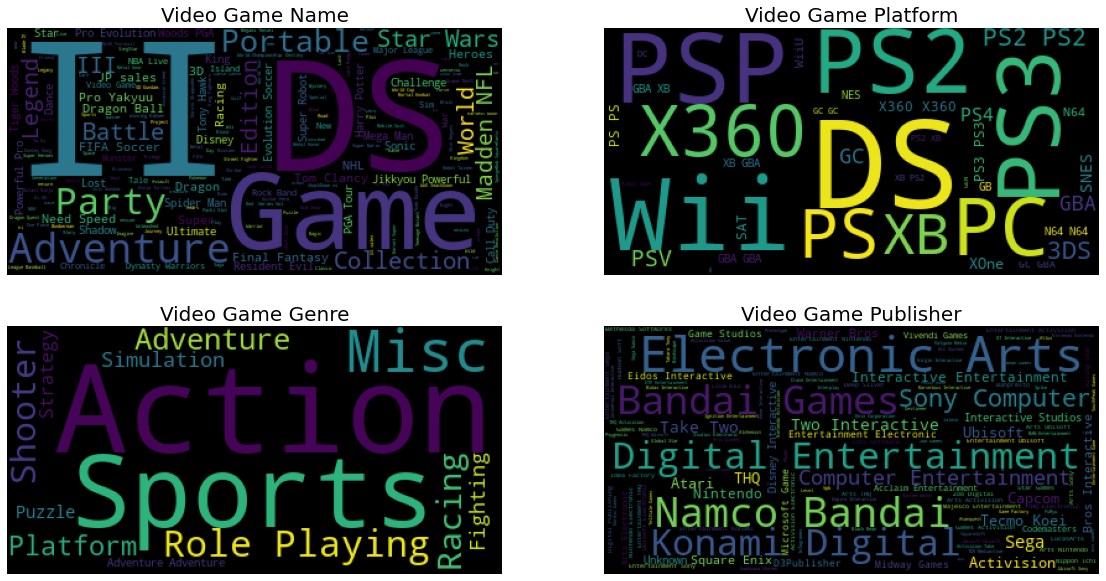

In [ ]:
global_sales = df.sort_values(by='Other_Sales', ascending=False)

# plt.subplot(1, 2, 1)


fig = plt.figure(figsize=(17,17))


for index, col,  in enumerate(categorical_features):
    
    plt.subplot(len(categorical_features), 2, index + 1)
    
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        stopwords=stopwords
    ).generate(" ".join(global_sales[col]))
    
    
    plt.imshow(wordcloud)
    plt.title("Video Game " + col, fontsize=20)
    plt.axis('off')
    plt.tight_layout(pad=3)

plt.show()

####Displaying the correlation for the numerical feature.####


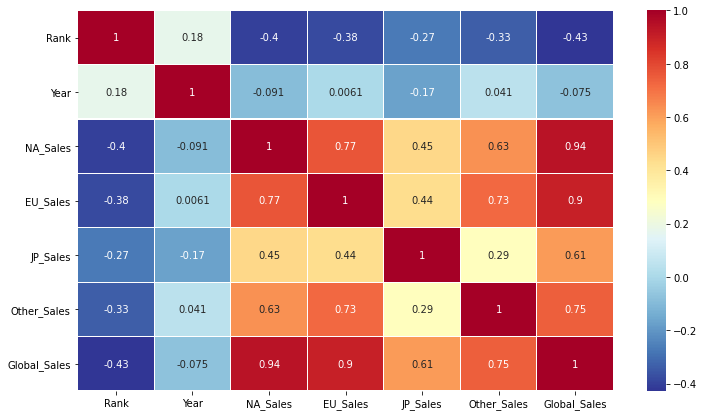

In [ ]:
corr_ = df.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')
plt.show()

####Implementing the LabelEncoder.####

In [ ]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()

le = LabelEncoder()
feature = ["Platform", "Genre"]

for col in feature:
    data[col] = le.fit_transform(df[col])

Splitting the data in train and test set

In [ ]:
X = data[['Platform', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values
y = data['Global_Sales'].values

In [ ]:
X[:5], y[:5]

(array([[26.  , 10.  , 41.49, 29.02,  3.77,  8.46],
        [11.  ,  4.  , 29.08,  3.58,  6.81,  0.77],
        [26.  ,  6.  , 15.85, 12.88,  3.79,  3.31],
        [26.  , 10.  , 15.75, 11.01,  3.28,  2.96],
        [ 5.  ,  7.  , 11.27,  8.89, 10.22,  1.  ]]),
 array([82.74, 40.24, 35.82, 33.  , 31.37]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13278, 6), (13278,), (3320, 6), (3320,))

###**Implementing and selecting models**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

####Linear Regression####

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
r2_MultiLinear = r2_score(y_test,pred)

In [ ]:
print(r2_MultiLinear)
print(lr.score(X_test, y_test))

0.9999928402231678
0.9999928402231679


####KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
kRange = range(1,15,1)

scores_list = []
for i in kRange:
    regressor_knn = KNeighborsRegressor(n_neighbors = i)
    
    regressor_knn.fit(X_train,y_train)
    pred = regressor_knn.predict(X_test)
    
    scores_list.append(r2_score(y_test,pred))

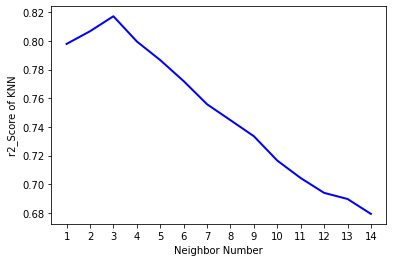

In [ ]:
plt.plot(kRange, scores_list, linewidth=2, color='blue')
plt.xticks(kRange)

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()  

Training the KNN model 

In [ ]:
regressor_knn = KNeighborsRegressor(n_neighbors = 3)

regressor_knn.fit(X_train,y_train)
pred = regressor_knn.predict(X_test)

r2_knn = r2_score(y_test,pred)
print(r2_knn)

0.817228187755969


####Decision Tree####

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=32)

In [ ]:
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)
print(r2_score(y_test, pred))

0.8180496485983251


####RandomForest####

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state= 10)

In [ ]:
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
print(r2_score(y_test, pred))

0.8233907346850412


####SVM####

In [ ]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear')
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_linear.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)

pred_linear = svr_linear.predict(X_test)
pred_rbf = svr_rbf.predict(X_test)

print(r2_score(y_test, pred_linear))
print(r2_score(y_test, pred_rbf))

0.9983709152995387
0.4836465140034072


###Some Key take aways from the Analysis:###
* Over the last few years there is decrease in the games which have crossed 100K copies sales.
* In fact last 5-6 years has seen decrease in the revenue.
* Nintendo is the top most publisher by revenue.
* Action is the top most genre by revenue.
* Action is ruling the market from 2001
* Play Station is the most popular platform
* EA is the top most publisher by number of releases.
* Platform Genre generated most revenue per release.
* Wii Sports is the top most game by revenue.
* North America and Europe contribute 75% of the market share by revenue.